In [3]:
# 导包
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from torchvision.transforms import ToTensor
from sklearn.datasets import fetch_olivetti_faces

In [6]:
# 提取数据集 并且将数据集转换成张量
faces = fetch_olivetti_faces(data_home = './face_data' , shuffle = True,)
# # 百分之三十测试数据集  百分之七十 训练数据集
# train_data, test_data , train_target , test_target = train_test_split(faces.data , faces.target , test_size = 0.3 , random_state = 50)

# 将图片数据集转换成张量
image = torch.FloatTensor(faces.data)
targets = torch.LongTensor(faces.target)

# image.shape
# targets.shape

# 将每个图片对应一个标签
datas = [(img , lbl) for img , lbl in zip(image , targets)]
# datas[1]

In [46]:
# 设置权重参数 (学习率、训练轮数、训练批次)
LR = 0.1
epochs = 50
BATCH_SIZE = 128
# 设置数据集的l批次
train_dl = DataLoader(datas , batch_size = BATCH_SIZE , shuffle = True )

In [49]:
from week04.Model import Model
# 数据模型
model = Model()

In [55]:
def train_iter(epochs , model , train_dl):
    train_hist = []
    # 定义损失函数
    loss_fun = nn.CrossEntropyLoss()
    # 设置优化器
    optimizer = torch.optim.SGD(model.parameters() , lr = LR)
    for epoch in range(epochs):
        for data , target in train_dl:
            # 前向运算
            output = model(data.reshape(-1 , 4096))
             # 计算损失
            loss = loss_fun(output , target)
             # 反向传播
            optimizer.zero_grad() # 所有参数梯度清零
            loss.backward()  # 计算梯度
            optimizer.step() # 更新参数

        print(f'Epoch:{epoch} Loss:{loss.item()}')
        train_hist.append(loss.item())
    return train_hist

In [26]:
def draw_train_hist(hist_list):
    plt.plot(hist_list)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.show()

Epoch:0 Loss:0.009972686879336834
Epoch:1 Loss:0.004469070117920637
Epoch:2 Loss:0.004670504946261644
Epoch:3 Loss:0.007204246241599321
Epoch:4 Loss:0.021633563563227654
Epoch:5 Loss:0.00642508827149868
Epoch:6 Loss:0.007310830056667328
Epoch:7 Loss:0.007568709086626768
Epoch:8 Loss:0.0051672630943357944
Epoch:9 Loss:0.005248738918453455
Epoch:10 Loss:0.009388977661728859
Epoch:11 Loss:0.023418545722961426
Epoch:12 Loss:0.03425225988030434
Epoch:13 Loss:0.009266112931072712
Epoch:14 Loss:0.019334202632308006
Epoch:15 Loss:0.021728863939642906
Epoch:16 Loss:0.008911166340112686
Epoch:17 Loss:0.009342829696834087
Epoch:18 Loss:0.008581148460507393
Epoch:19 Loss:0.00472076004371047
Epoch:20 Loss:0.011066589504480362
Epoch:21 Loss:0.004083291161805391
Epoch:22 Loss:0.022195156663656235
Epoch:23 Loss:0.006749750580638647
Epoch:24 Loss:0.009881924837827682
Epoch:25 Loss:0.006548051722347736
Epoch:26 Loss:0.004165041260421276
Epoch:27 Loss:0.003572808811441064
Epoch:28 Loss:0.0114019205793738

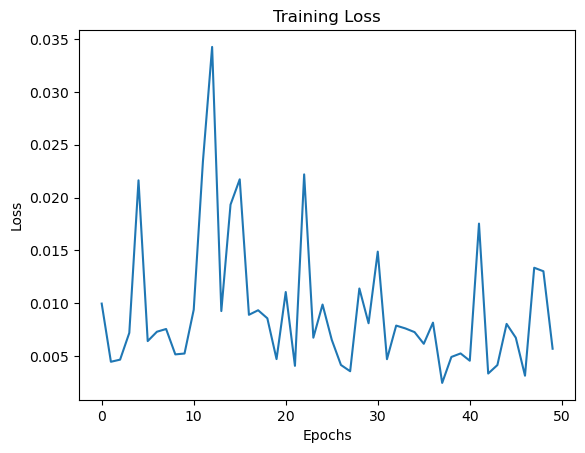

In [27]:
# 加入归一化
model1_hist = train_iter(epochs, model, train_dl)
draw = draw_train_hist(model1_hist)

Epoch:0 Loss:1.4789239685342181e-05
Epoch:1 Loss:1.75607801793376e-05
Epoch:2 Loss:1.7098847820307128e-05
Epoch:3 Loss:2.28728458750993e-05
Epoch:4 Loss:1.947552664205432e-05
Epoch:5 Loss:1.9482809875626117e-05
Epoch:6 Loss:2.2336333131534047e-05
Epoch:7 Loss:2.122633668477647e-05
Epoch:8 Loss:2.2336482288665138e-05
Epoch:9 Loss:1.3924963241152e-05
Epoch:10 Loss:3.360866321600042e-05
Epoch:11 Loss:3.041254785784986e-05
Epoch:12 Loss:2.0309929823270068e-05
Epoch:13 Loss:2.370722904743161e-05
Epoch:14 Loss:2.3632817828911357e-05
Epoch:15 Loss:2.9362048735492863e-05
Epoch:16 Loss:1.759806582413148e-05
Epoch:17 Loss:1.9818236978608184e-05
Epoch:18 Loss:2.1658488549292088e-05
Epoch:19 Loss:2.031738949881401e-05
Epoch:20 Loss:2.364018655498512e-05
Epoch:21 Loss:2.0600513380486518e-05
Epoch:22 Loss:1.7463948097429238e-05
Epoch:23 Loss:1.9028495444217697e-05
Epoch:24 Loss:1.9631985196610913e-05
Epoch:25 Loss:2.1032665245002136e-05
Epoch:26 Loss:1.5161738701863214e-05
Epoch:27 Loss:2.2403550246

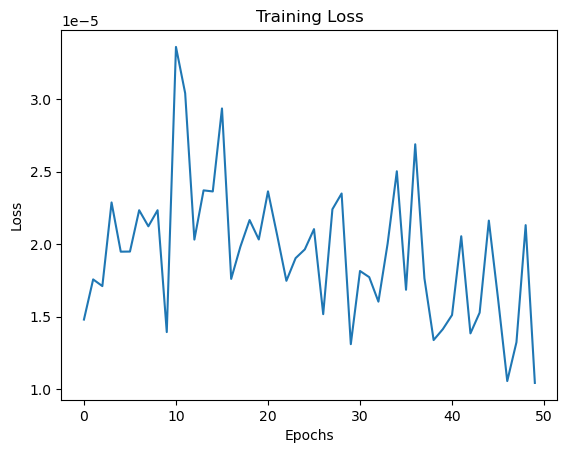

In [57]:
# 加入归一化 和 正则化
model1_hist = train_iter(epochs, model, train_dl)
draw = draw_train_hist(model1_hist)

Epoch:0 Loss:0.018414601683616638
Epoch:1 Loss:0.03733566775918007
Epoch:2 Loss:0.016532383859157562
Epoch:3 Loss:0.03888344764709473
Epoch:4 Loss:0.01602509617805481
Epoch:5 Loss:0.026510991156101227
Epoch:6 Loss:0.010976118966937065
Epoch:7 Loss:0.009317443706095219
Epoch:8 Loss:0.022645097225904465
Epoch:9 Loss:0.01969786547124386
Epoch:10 Loss:0.02728886902332306
Epoch:11 Loss:0.012266295030713081
Epoch:12 Loss:0.024309206753969193
Epoch:13 Loss:0.021875644102692604
Epoch:14 Loss:0.015307977795600891
Epoch:15 Loss:0.015666674822568893
Epoch:16 Loss:0.027943145483732224
Epoch:17 Loss:0.01756550930440426
Epoch:18 Loss:0.01183573342859745
Epoch:19 Loss:0.02424228936433792
Epoch:20 Loss:0.010327105410397053
Epoch:21 Loss:0.011154782958328724
Epoch:22 Loss:0.019880492240190506
Epoch:23 Loss:0.023559125140309334
Epoch:24 Loss:0.025830775499343872
Epoch:25 Loss:0.012434915639460087
Epoch:26 Loss:0.04703373834490776
Epoch:27 Loss:0.011933505535125732
Epoch:28 Loss:0.011356892064213753
Epoc

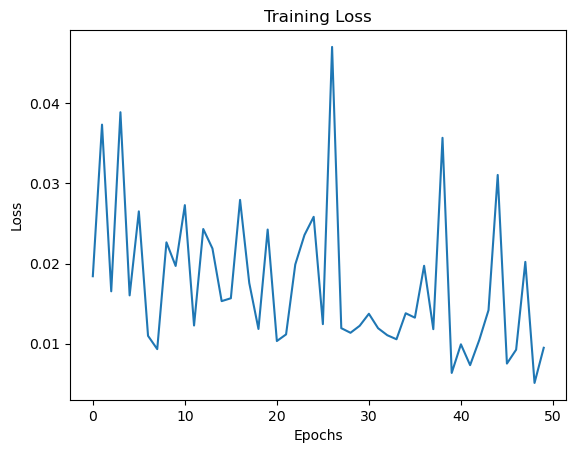

In [51]:
# 只加 正则化
model1_hist = train_iter(epochs, model, train_dl)
draw = draw_train_hist(model1_hist)

Epoch:0 Loss:4.8427071305923164e-05
Epoch:1 Loss:6.475736881839111e-05
Epoch:2 Loss:5.01701797475107e-05
Epoch:3 Loss:3.869747888529673e-05
Epoch:4 Loss:5.220998718868941e-05
Epoch:5 Loss:5.2248935389798135e-05
Epoch:6 Loss:3.964298593928106e-05
Epoch:7 Loss:5.981722642900422e-05
Epoch:8 Loss:4.263819573679939e-05
Epoch:9 Loss:3.197700425516814e-05
Epoch:10 Loss:3.817577817244455e-05
Epoch:11 Loss:4.151328175794333e-05
Epoch:12 Loss:5.25471696164459e-05
Epoch:13 Loss:4.917940168525092e-05
Epoch:14 Loss:4.204955985187553e-05
Epoch:15 Loss:4.526812335825525e-05
Epoch:16 Loss:5.2643743401858956e-05
Epoch:17 Loss:4.420992991072126e-05
Epoch:18 Loss:3.3482148865005e-05
Epoch:19 Loss:3.8562979170819744e-05
Epoch:20 Loss:4.352453106548637e-05
Epoch:21 Loss:2.9339758839341812e-05
Epoch:22 Loss:2.866932118195109e-05
Epoch:23 Loss:3.952431507059373e-05
Epoch:24 Loss:3.389196717762388e-05
Epoch:25 Loss:4.505955075728707e-05
Epoch:26 Loss:4.2637962906155735e-05
Epoch:27 Loss:4.2675303120631725e-05

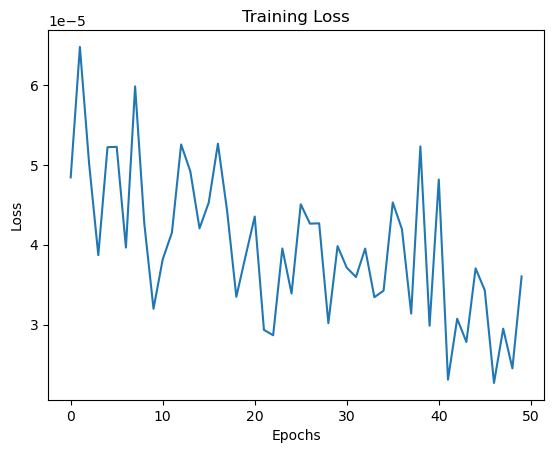

In [54]:
# 让正则和归一失效
model1_hist = train_iter(epochs, model, train_dl)
draw = draw_train_hist(model1_hist)